Univariate Analysis

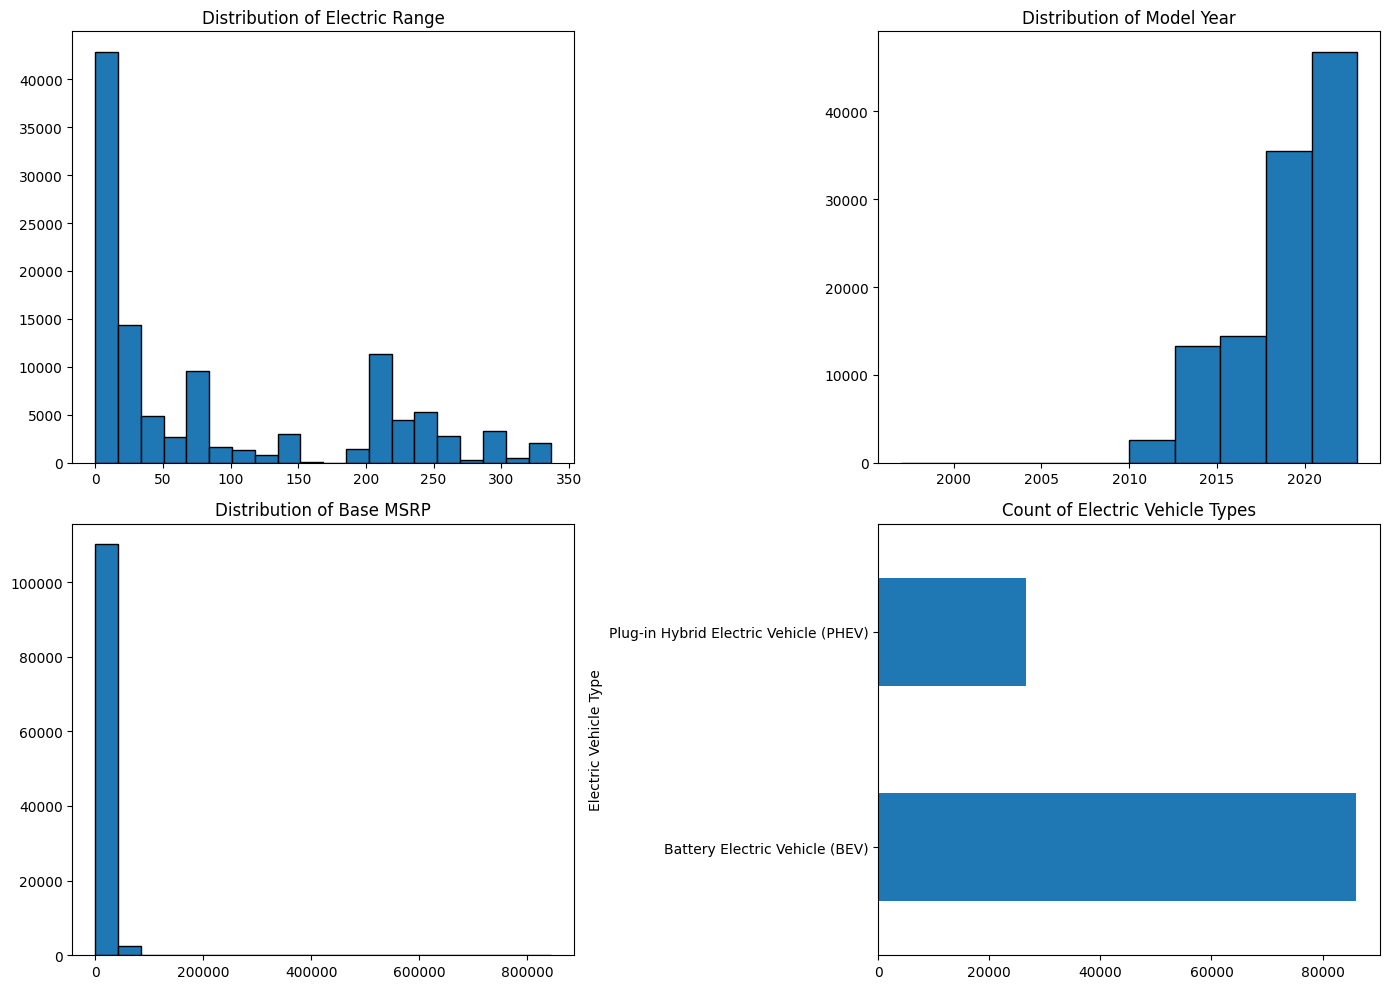

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

summary_stats = data.describe()
missing_values = data.isnull().sum()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(data['Electric Range'], bins=20, edgecolor='black')
axes[0, 0].set_title('Distribution of Electric Range')

axes[0, 1].hist(data['Model Year'], bins=10, edgecolor='black')
axes[0, 1].set_title('Distribution of Model Year')

axes[1, 0].hist(data['Base MSRP'], bins=20, edgecolor='black')
axes[1, 0].set_title('Distribution of Base MSRP')

data['Electric Vehicle Type'].value_counts().plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title('Count of Electric Vehicle Types')

plt.tight_layout()
plt.show()

print(summary_stats)
print(missing_values)

Bivariate Analysis

<Figure size 1200x600 with 0 Axes>

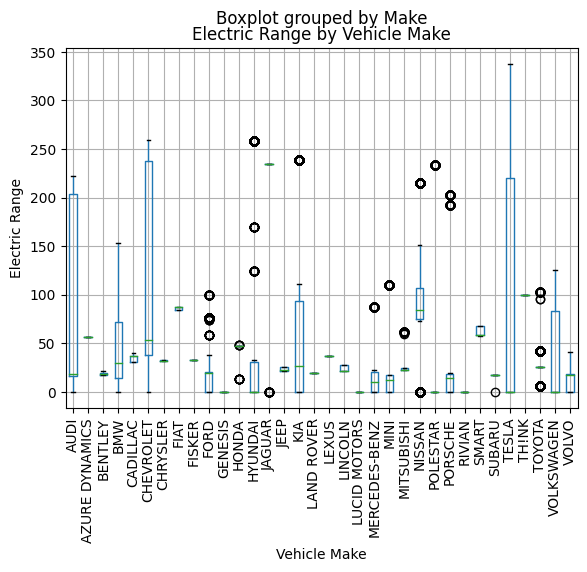

<Figure size 800x600 with 0 Axes>

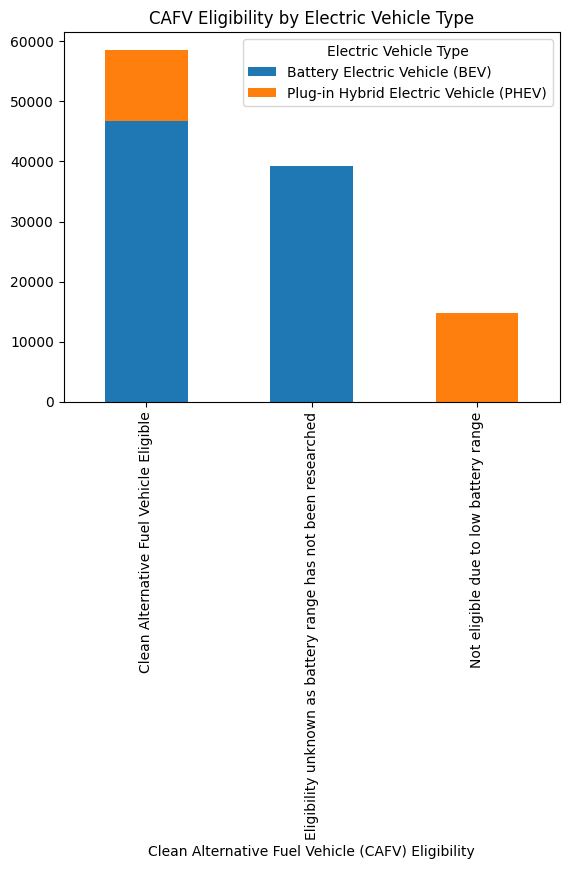

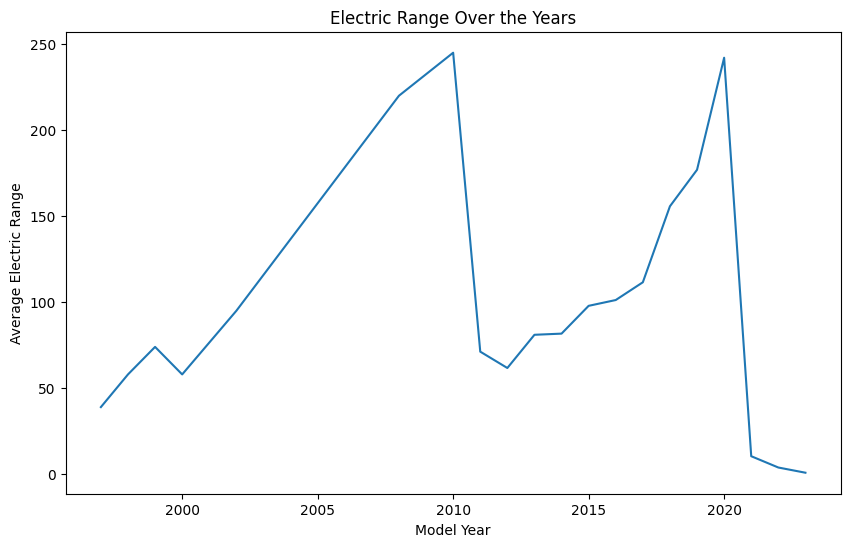

In [ ]:
plt.figure(figsize=(12, 6))
data.boxplot(column='Electric Range', by='Make', rot=90)
plt.title('Electric Range by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Electric Range')
plt.show()

plt.figure(figsize=(8, 6))
data.groupby(['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('CAFV Eligibility by Electric Vehicle Type')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data.groupby('Model Year')['Electric Range'].mean())
plt.title('Electric Range Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.show()

Task 2: Creating a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [ ]:
import plotly.express as px

In [ ]:
county_ev_counts = data.groupby(['County', 'State']).size().reset_index(name='EV Count')

county_ev_counts['Location'] = county_ev_counts['County'] + ', ' + county_ev_counts['State']

fig = px.choropleth(
    county_ev_counts,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    hover_name='County',
    scope='usa',
    labels={'EV Count': 'Number of EVs'},
    title='Choropleth Map of Electric Vehicles by State and County',
    range_color=[0, 50]
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

Task 3: Creating a Racing Bar Plot to display the animation of EV Make and its count each year.


In [7]:
!pip install bar-chart-race

In [5]:
import bar_chart_race as bcr

In [6]:
import pandas as pd

data = pd.read_csv('dataset.csv')
ev_make_counts = data.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

# Pivot the DataFrame to have Model Years as columns and car makes as index
final = ev_make_counts.pivot(index='Make', columns='Model Year', values='Count').fillna(0)

# Step 5: Create a Racing Bar Plot
bcr.bar_chart_race(
    df=final,
    filename="final2.mp4",
    orientation="h",
    sort="desc",
    n_bars=10,
    steps_per_period=45,
    period_length=3000,
    title='Year-wise sales of each Maker from last decade',
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
